[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-ML-DL-NOC24EE146/blob/main/Week2_Intro_to_datasets_feature_extraction.ipynb)

**GitHub Profile:** [https://github.com/rsarka34](https://github.com/rsarka34)

**Official Website:** [https://sites.google.com/view/arka-roy/home](https://sites.google.com/view/arka-roy/home)

**Dataset used:** [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html).
 The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

**Dataset used:** [MNIST](https://yann.lecun.com/exdb/mnist/).
 The CIFAR-10 dataset consists of 60000 28X28 gray-scale images in 10 classes. There are 60000 training images and 10000 test images.

**Library used to extract feature:**[ skimage](https://scikit-image.org/)

In [1]:
import PIL
import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets

In [2]:
from tqdm import tqdm
import time

# Define an iterable (e.g., range) and wrap it with tqdm
for i in tqdm(range(20)):
    # Simulate some computation
    time.sleep(0.1)

100%|██████████| 20/20 [00:02<00:00,  9.82it/s]


**Download the Cifar10 dataset from Pytorch**

In [3]:
trainDataset =  datasets.CIFAR10('./cifar10/', train=True, download=True)
testDataset =  datasets.CIFAR10('./cifar10/', train=False, download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 68420769.04it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10/
Files already downloaded and verified


In [4]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainDataset)))
print('No. of samples in test set: '+str(len(testDataset)))

No. of samples in train set: 50000
No. of samples in test set: 10000


In [5]:
# Feature extraction on single image
img = trainDataset[0][0] #PIL image
type(img)
width, height = img.size
print('The size of the image = (' + str(height)+','+str(width)+')')

The size of the image = (32,32)


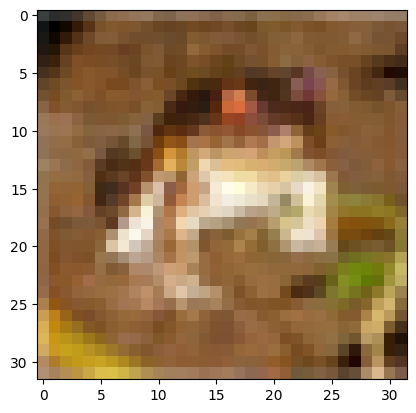

In [6]:
img_arr = np.array(img) #Converting to array
plt.imshow(img)

**Load MNIST Using tensorflow-keras**

In [7]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Train dataset shape = '+str(train_images.shape))
print('Test dataset shape = '+str(test_images.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train dataset shape = (60000, 28, 28)
Test dataset shape = (10000, 28, 28)


Text(0.5, 1.0, 'This digit is = 4')

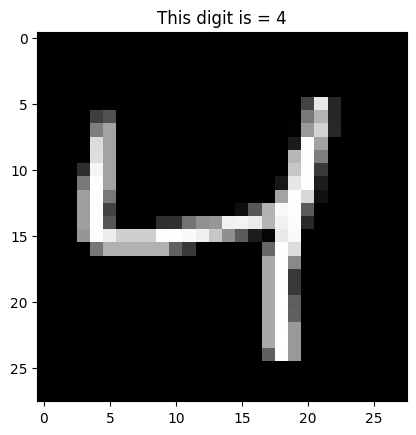

In [9]:
idx=2

plt.imshow(train_images[idx], cmap='gray');
plt.title('This digit is = ' +str(train_labels[idx]))

In [10]:
def plot_10_by_10_images(images):
    # figure size
    fig = plt.figure(figsize=(10,10))
    # plot image grid
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            plt.imshow(images[10*y+x], cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

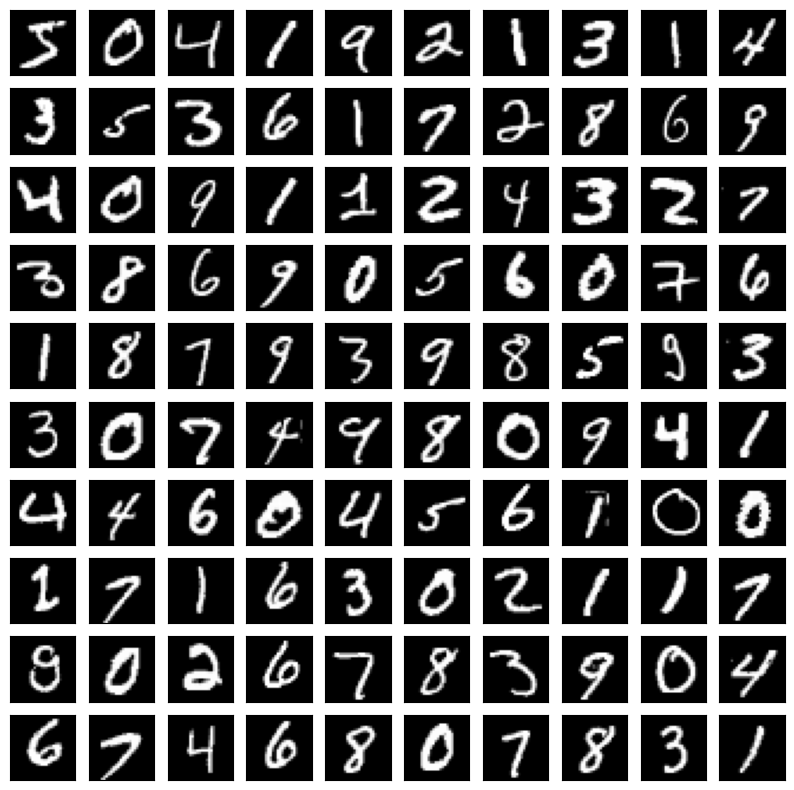

In [11]:
plot_10_by_10_images(train_images[:100])

**Load CIFAR10 Using tensorflow-keras**

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train dataset shape = ' + str(x_train.shape))
print('Test dataset shape = ' + str(x_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train dataset shape = (50000, 32, 32, 3)
Test dataset shape = (10000, 32, 32, 3)


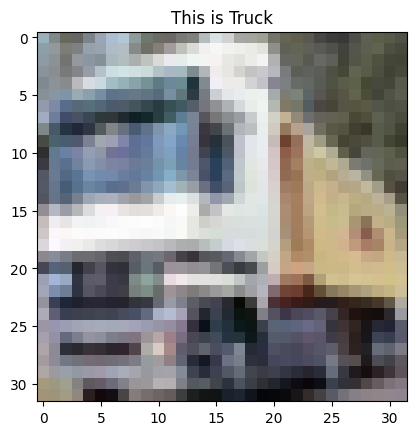

In [13]:
label_names = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

idx = 1
x_train_img = x_train[idx]
y_train_label = y_train[idx][0]  # Extract the actual class label

def plot_the_data(x_img, lbl):
    plt.imshow(x_img)
    plt.title('This is ' + (label_names[lbl]))
    plt.show()

plot_the_data(x_train_img, y_train_label)

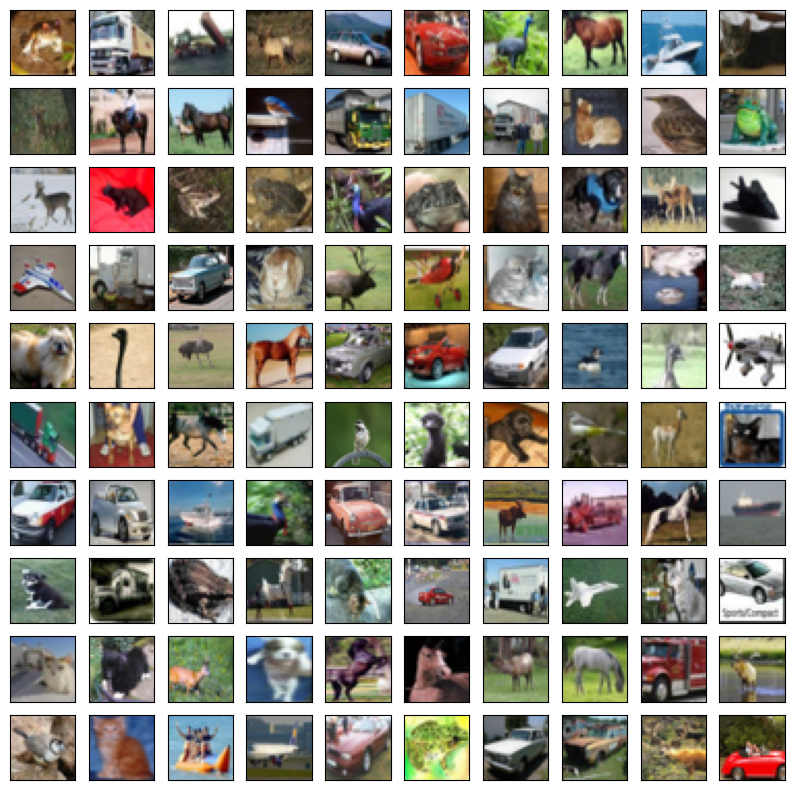

In [14]:
plot_10_by_10_images(x_train[:100])

**Local binary pattern**

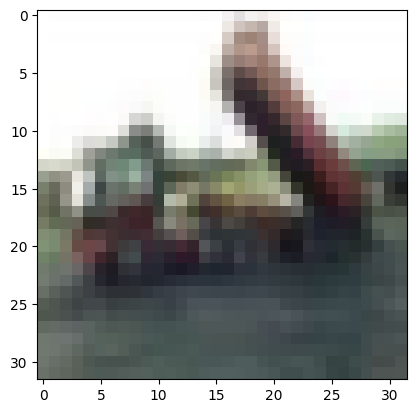

In [15]:
image_ar=x_train[2,:,:,:]
plt.imshow(image_ar)

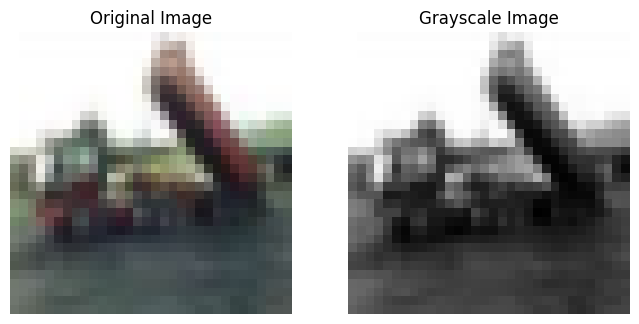

In [21]:
from skimage.feature import local_binary_pattern
image_index = 2
image_3channel = x_train[image_index,:,:,:] # 32*32*3
# Convert the selected image to grayscale
gray_image = tf.image.rgb_to_grayscale(image_3channel) # 32*32*1

# Reshape the grayscale image
gray_image = tf.squeeze(gray_image)

# Display the original and grayscale images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_3channel)
plt.title("Original Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

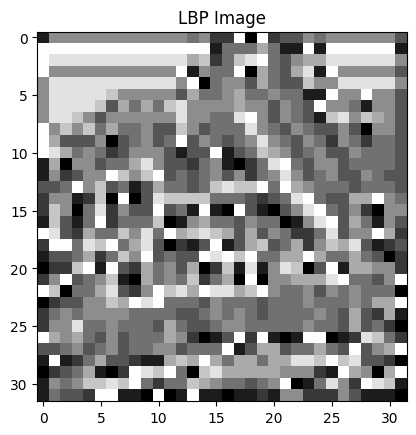

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Assuming gray_image is a TensorFlow tensor
# Convert TensorFlow tensor to NumPy array
gray_image = gray_image.numpy()

# Compute LBP
radius = 1  # Radius of the circle
n_points = 8 * radius  # Number of points on the circle
fea_lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Normalize and convert to uint8
fea_lbp = np.uint8((fea_lbp / fea_lbp.max()) * 255)

# Display the LBP image
plt.imshow(fea_lbp, cmap='gray')
plt.title('LBP Image')
plt.show()

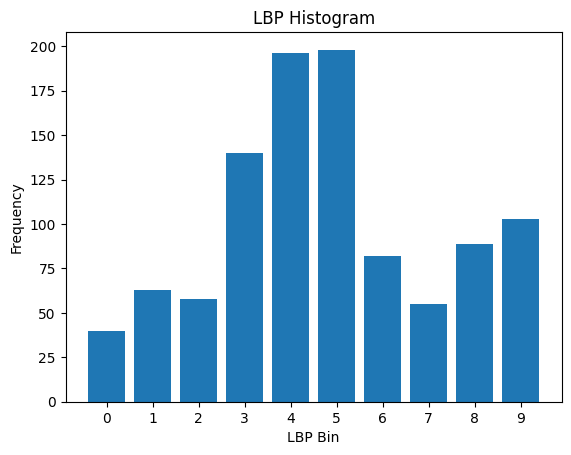

LBP energy = 0.128204345703125
LBP entropy = 3.1301290062827665


In [23]:
# Energy and Entropy of LBP feature
lbp_hist,_ = np.histogram(fea_lbp,10,range=(0,255))
lbp_hist = np.array(lbp_hist,dtype=float)

# Plot LBP histogram
plt.bar(range(10), lbp_hist, align='center', alpha=1)
plt.title('LBP Histogram')
plt.xlabel('LBP Bin')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.show()

lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy = '+str(lbp_energy))
print('LBP entropy = '+str(lbp_entropy))

**Gabor filtering**

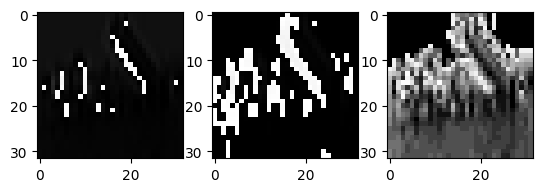

In [24]:
from skimage.filters import gabor
# Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(gray_image,frequency=0.6)
gaborFilt = np.sqrt((gaborFilt_real**2+gaborFilt_imag**2))
# Displaying the filter response
fig, ax = plt.subplots(1,3)
ax[0].imshow(gaborFilt_real,cmap='gray')
ax[1].imshow(gaborFilt_imag,cmap='gray')
ax[2].imshow(gaborFilt,cmap='gray')

**Generating features from all the images**

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train dataset shape = ' + str(x_train.shape))
print('Test dataset shape = ' + str(x_test.shape))

Train dataset shape = (60000, 28, 28)
Test dataset shape = (10000, 28, 28)


In [26]:
x_train.shape[0]

60000

In [27]:
# Generating training data by extracting features from all images
class_labels = [] # it would not be array datatype rather it is of list datatype
featLength = 2+2
trainFeats = np.zeros((2000,featLength))  # you can replace 2000 by x_train.shape[0]

for tr in tqdm(range(2000)): # you can replace 2000 by x_train.shape[0]
    img = x_train[i,:,:] #One image at a time
    img_arr = np.array(img) #Converting to array
    # LBP
    feat_lbp = local_binary_pattern(img_arr,5,2,'uniform')
    lbp_hist,_ = np.histogram(feat_lbp,8)
    lbp_hist = np.array(lbp_hist,dtype=float)
    lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
    lbp_energy = np.nansum(lbp_prob**2)
    lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
    # Gabor filter
    gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
    gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
    gabor_hist,_ = np.histogram(gaborFilt,8)
    gabor_hist = np.array(gabor_hist,dtype=float)
    gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
    gabor_energy = np.nansum(gabor_prob**2)
    gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
    # Concatenating features(2+2)
    concat_feat = np.concatenate(([lbp_energy,lbp_entropy],[gabor_energy,gabor_entropy]),axis=0)
    trainFeats[tr,:] = concat_feat #Stacking features vectors for each image
    # Class label
    class_labels.append(y_train[tr]) # list data type

trainLabel = np.array(class_labels)
print()
print('FEATURE SHAPE==>' + str(trainFeats.shape))
print('LABEL SHAPE==>' + str(trainLabel.shape))

  0%|          | 0/2000 [00:00<?, ?it/s]<ipython-input-27-b633334fe4b0>:15: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
<ipython-input-27-b633334fe4b0>:15: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
100%|██████████| 2000/2000 [00:02<00:00, 791.44it/s]


FEATURE SHAPE==>(2000, 4)
LABEL SHAPE==>(2000,)


In [29]:
type(trainLabel)

numpy.ndarray

**Save them in pickle file**

In [30]:
import pickle
def pickle_save(location_to_save,dumping_var):
    outfile = open(location_to_save,'wb')
    pickle.dump(dumping_var,outfile)
    outfile.close()
    print('=========done=========')

base_location='/content/'
saving_features=base_location+'trainFeatures_2k'
saving_labels=base_location+'trainlabels_2k'

pickle_save(saving_features,trainFeats)
pickle_save(saving_labels,trainLabel)

=========done=========
=========done=========


**Loading the pickle file**

In [31]:
import pickle
def load_pickle_file(name_of_file):
    infile = open(name_of_file,'rb')
    wgt = pickle.load(infile)
    infile.close()
    print('=========loading done=========')
    return wgt

arr_from_pkl= load_pickle_file('/content/trainFeatures_2k')
arr_from_pkl.shape

=========loading done=========


(2000, 4)

In [32]:
np.savetxt('my_feature.txt',trainFeats)

# ECG classification
A typical task for applied Machine Learning in medicine is an automatic classification of signals from diagnostic devices such as ECG

Typical pipeline:
- detect QRS compexes (beats)
- classify them:
> - normal beat N
> - arrhytmia, e.g. *venticular* V, *supraventicular* S arrytmia, or *artial fibrillation* AF

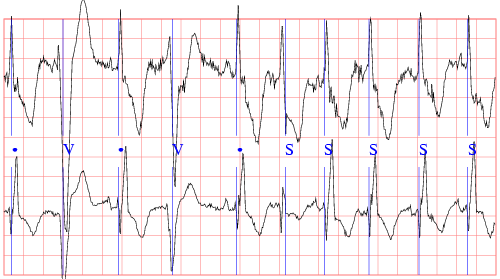

![ECG signal](https://ars.els-cdn.com/content/image/1-s2.0-S0950705120307188-gr1.jpg)

a couple of links:
- [exemplary challenge from Physionet](https://physionet.org/content/challenge-2017/1.0.0/)
- [some recent paper on ECG classification](https://doi.org/10.1016/j.knosys.2020.106589)

## our challenge: classify beats as normal or abnormal (arrhytmia)
- we will utilize signals from **svdb** database, and grab subsequent beats (data preprocessing)
- then construct binary classifier using NN, decision trees, ensemble metchods, and SVM or NaiveBayes

In [33]:
import os
import numpy as np

# install PhysioNet ecg data package
!pip install wfdb
import wfdb

# list of available datasets
dbs = wfdb.get_dbs()
display(dbs)

# we choose svdb
svdb_dir = os.path.join(os.getcwd(), 'svdb_dir')
wfdb.dl_database('svdb', dl_dir=svdb_dir)

# Display the  downloaded content
svdb_in_files = [os.path.splitext(f)[0] for f in os.listdir(svdb_dir) if f.endswith('.dat')]
print(svdb_in_files)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00


[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['actes-cycloergometer-exercise',
  'Cardiorespiratory measurement from graded cycloergometer exercise testing'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['ann-pt-summ',
  'Medical Expert Annotations of Unsupported Facts in Doctor-Written and LLM-Generated Patient Summaries'],
 ['annotation-dataset-sdoh',
  'Annotation dataset of social determinants of health from MIMIC-III Clinical Care Database'],
 ['annotation-dataset-sdoh',
  'Annotation dataset of social determinants of health from MIMIC-III Clinical Care Database'],
 ['annotation-opioid-use-notes',
  'Annotation dataset of problematic opioid u

Generating record list for: 800
Generating record list for: 801
Generating record list for: 802
Generating record list for: 803
Generating record list for: 804
Generating record list for: 805
Generating record list for: 806
Generating record list for: 807
Generating record list for: 808
Generating record list for: 809
Generating record list for: 810
Generating record list for: 811
Generating record list for: 812
Generating record list for: 820
Generating record list for: 821
Generating record list for: 822
Generating record list for: 823
Generating record list for: 824
Generating record list for: 825
Generating record list for: 826
Generating record list for: 827
Generating record list for: 828
Generating record list for: 829
Generating record list for: 840
Generating record list for: 841
Generating record list for: 842
Generating record list for: 843
Generating record list for: 844
Generating record list for: 845
Generating record list for: 846
Generating record list for: 847
Generati

(1738, 96)
(1728,)
['S' 'N' 'N' ... 'N' 'N' 'N']


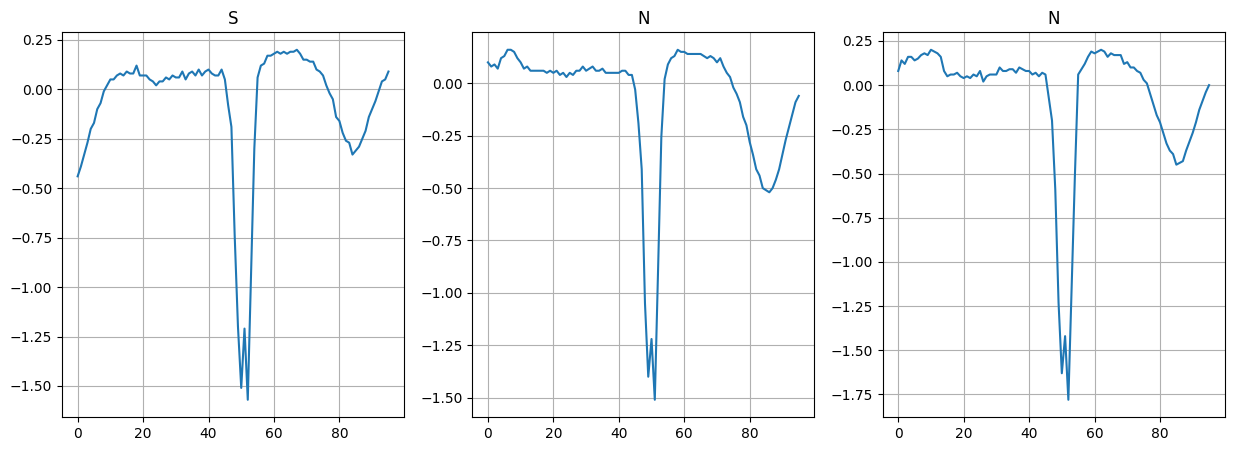

In [34]:
time_window = 48;all_beats=[];all_annotations=[]
signal, fields = wfdb.rdsamp(os.path.join(svdb_dir,svdb_in_files[0]), channels=[1])
annotations = wfdb.rdann(os.path.join(svdb_dir,svdb_in_files[0]), 'atr')
signal=np.array(signal).flatten()
beats = np.zeros((len(annotations.sample),time_window*2))
for i, ann_position in enumerate(annotations.sample[5:-5]):
        beats[i] = signal[ann_position-time_window:ann_position+time_window]
all_beats.append(beats)
all_annotations.append(annotations.symbol[5:-5])
all_beats = np.concatenate(all_beats)
all_annotations = np.concatenate(all_annotations)

print(all_beats.shape)
print(all_annotations.shape)
print(all_annotations)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(all_beats[0]); plt.grid()
plt.title(all_annotations[0])
plt.subplot(132)
plt.plot(all_beats[100]); plt.grid()
plt.title(all_annotations[100])
plt.subplot(133)
plt.plot(all_beats[1000]); plt.grid()
plt.title(all_annotations[100])
plt.show()

In [35]:
time_window = 48
all_beats = []
all_annotations = []
for in_file in svdb_in_files:
    print('...processing...' + in_file + '...file')
    signal, fields = wfdb.rdsamp(os.path.join(svdb_dir,in_file), channels=[0])
    annotations = wfdb.rdann(os.path.join(svdb_dir,in_file), 'atr')
    signal=np.array(signal).flatten()
    # grab subsequent heartbeats within [position-64,position+64] window
    beats = np.zeros((len(annotations.sample),time_window*2))
    # note that we remove first and last beats to ensure that all beats have equal lengths
    for i, ann_position in enumerate(annotations.sample[5:-5]):
        beats[i] = signal[ann_position-time_window:ann_position+time_window]
    all_beats.append(beats)
    # consequently, we remove few first and last annotations
    all_annotations.append(annotations.symbol[5:-5])

all_beats = np.concatenate(all_beats)
all_annotations = np.concatenate(all_annotations)

# check which annotations are usable for us, are of N or S or V class
indices = [i for i, ann in enumerate(all_annotations) if ann in {'N','S','V'}]
# and get only these
all_beats = all_beats[indices]
all_annotations = np.array([all_annotations[i] for i in indices])

# print data statistics
print(all_beats.shape, all_annotations.shape)
print('no of N beats: ' + str(np.count_nonzero(all_annotations == 'N')))
print('no of S beats: ' + str(np.count_nonzero(all_annotations == 'S')))
print('no of V beats: ' + str(np.count_nonzero(all_annotations == 'V')))

...processing...889...file
...processing...890...file
...processing...874...file
...processing...878...file
...processing...852...file
...processing...880...file
...processing...857...file
...processing...859...file
...processing...860...file
...processing...879...file
...processing...803...file
...processing...841...file
...processing...850...file
...processing...885...file
...processing...808...file
...processing...800...file
...processing...882...file
...processing...884...file
...processing...891...file
...processing...869...file
...processing...892...file
...processing...854...file
...processing...823...file
...processing...829...file
...processing...851...file
...processing...804...file
...processing...868...file
...processing...876...file
...processing...864...file
...processing...820...file
...processing...883...file
...processing...842...file
...processing...870...file
...processing...881...file
...processing...863...file
...processing...877...file
...processing...856...file
.

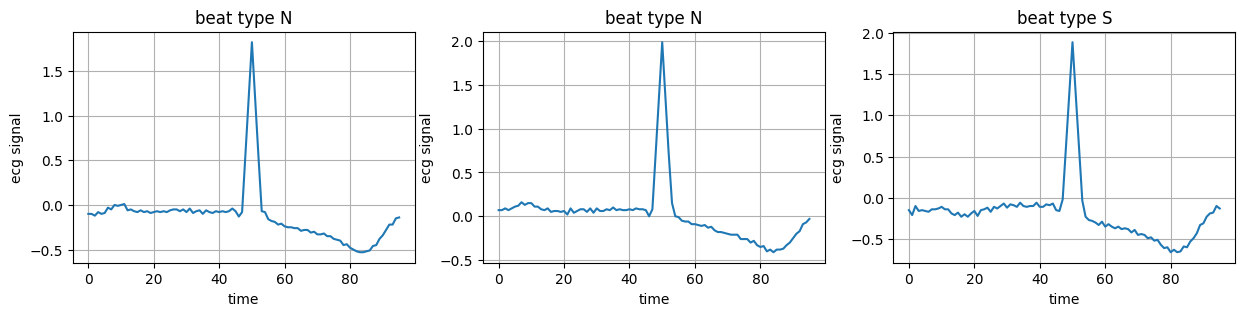

In [36]:
# show example samples
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3)
plt.subplots_adjust(wspace=0.2)
sample_number = [200,299,996]

for i, sn in enumerate(sample_number):
    ax[i].plot(all_beats[sn])
    ax[i].set(xlabel='time', ylabel='ecg signal', title='beat type ' + all_annotations[sn])
    ax[i].grid()
plt.show()

In [37]:
# prepare datasets and define error metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# to simplify experiments and speedup training
# we take only some part of the whole dataset
X, y = all_beats, all_annotations

# train/validation/test set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=0)
print(len(y_train), len(y_val), len(y_test))

# perform data normalization: z = (x - mu)/std
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# same for the validation subset
X_val = preprocessing.StandardScaler().fit_transform(X_val)
# and for the test subset
X_test = preprocessing.StandardScaler().fit_transform(X_test)

# define accuracy
def calculate_accuracy(y_pred, y_gt, comment='', printout=True):
    acc_t = np.count_nonzero(y_pred == y_gt)/len(y_gt)
    acc_a = np.count_nonzero(
        np.logical_and(y_pred == y_gt, y_gt != 'N'))/np.count_nonzero(y_gt != 'N')
    if printout is True:
        print('-----------------------------------')
        print(comment)
        print('Total accuracy, Acc_T = {:.4f}'.format(acc_t))
        print('Arrhythmia accuracy, Acc_A = {:.4f}'.format(acc_a))
        print('-----------------------------------')
    else: return acc_t, acc_a

128594 27556 27557


In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
calculate_accuracy(y_pred, y_test, comment='naive Bayes classifier')

-----------------------------------
naive Bayes classifier
Total accuracy, Acc_T = 0.7778
Arrhythmia accuracy, Acc_A = 0.1518
-----------------------------------


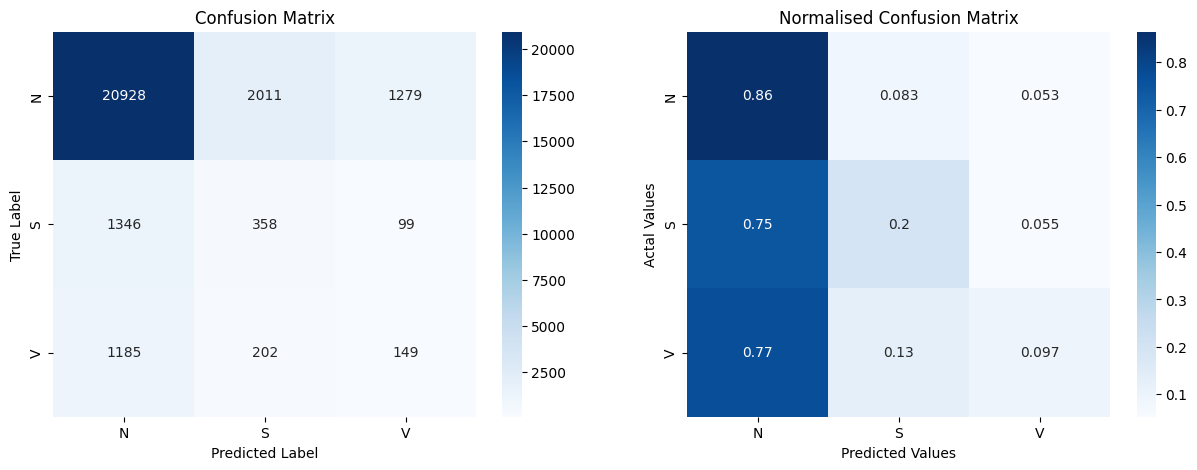

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['N','S','V'],
                     columns = ['N','S','V'])

cm_norm=confusion_matrix(y_test, y_pred,normalize='true')
cm_df_norm = pd.DataFrame(cm_norm,
                     index = ['N','S','V'],
                     columns = ['N','S','V'])
# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.subplot(122)
sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
plt.title('Normalised Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
